# Plotting histograms in Python
# Histograms are a great tool for viewing the probability distribution. It is somewhat similar to a bar graph.
## You can use any of these libraries for creating one: NumPy, Matplotlib, Pandas and Seaborn

## You have a data set and you wish to see the histogram of the "Age" column

   RowNumber  CustomerId   Surname  CreditScore Geography  GenderCategory  \
0          1    15634602  Hargrave          619    France               1   
1          2    15647311      Hill          608     Spain               1   
2          3    15619304      Onio          502    France               1   
3          4    15701354      Boni          699    France               1   
4          5    15737888  Mitchell          850     Spain               1   

   Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  Female   42       2       0.00              1          1               1   
1  Female   41       1   83807.86              1          0               1   
2  Female   42       8  159660.80              3          1               0   
3  Female   39       1       0.00              2          0               0   
4  Female   43       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1   

(0.0, 860.0)

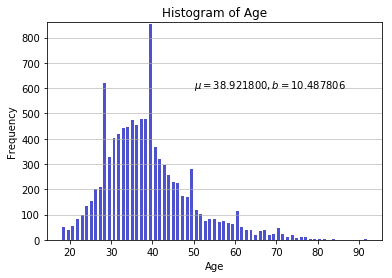

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statistics
%matplotlib inline

# Read the data
df = pd.read_csv("Churn_Modelling.csv")
print(df.head())

# Plot the histogram
# hist() returns:
# n - Array or list of arrays - Value of histogram bins
# bins - The edges of the bins
# patches - ?
# Parameters to the hist():
# x - The actual data to be plotted
# bins = 'auto' - Let the bins be decided automatically
# rwidth - The relative width of the bars as a fraction of the bin width. If None, automatically compute the width.

n, bins, patches = plt.hist(x=df.Age, bins='auto', color="#0509BB", alpha=0.7, rwidth=0.65)
print("**********************************")
print(n)
print(bins)
print(patches)
print("**********************************")

plt.grid(axis = 'y', alpha=0.75)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

mu = np.mean(df.Age)                                      # Compute the mean of the data
sd = statistics.stdev(df.Age)                             # Compute the SD of the data
plt.text(50,600, (r"$\mu=%f, b=%f$") % (mu, sd))          # Custom text at specific location on the plot

# Set a clean upper y-axis limit
maxfreq = n.max()
print(maxfreq)
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)


# Plotting using Pandas

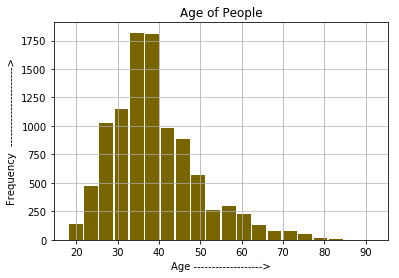

In [32]:
import pandas as pd
ageSeries = df.Age
ageSeries.plot.hist(grid=True, bins = 20, rwidth=0.9, color="#786500")
plt.title("Age of People")
plt.xlabel("Age ------------------->")
plt.ylabel("Frequency  ---------------------->")
plt.grid(axis='y', alpha=0.85)
# NOTE: The plot looks different from the top one, as we have altered the number of bins


# Inferences drawn from the histograms:
## 1. Shape: Overall shape of histogram - symmetric/bell shaped/ left skewed/ right skewed. If the data has a single peak, we call it as "UNIMODAL" or if 2 peaks "BIMODAL" or "MULTIMODAL"
## 2. Centre: Mean or median
## 3. Spread: How far our data reaches - range/ IQR/ Variance/standard deviation
## 4. Outliers: Data points that fall far from the data

# Inference of the above histogram:
## Shape: Right Skewed + unimodal
## Centre: Median age = 40, as then the area to the LHS = area to the RHS.
## Since the data is skewed, the mean will be pulled on the RHS and will be greater than 40. 

## Spread: Range = 92 - 15 = 77
## Outliers: Present on the high end of this distribution roughly after 80

# Conclusion: 
## The distribution of Age in the given data set is unimodal and skewed to the right, centered at about 45, with most of the data between age 92 and age 15,  a range of roughly 77 and the outliers are present on the higher end. 


# NOTE: Histograms are different from Barcharts.
## Histograms - are used for Quantitative Data
## Barcharts - are used for Categorical Data

# Alternative way of plotting the histogram

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


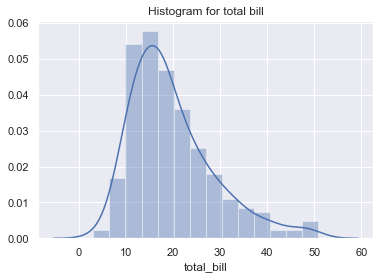

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)   

tips_data = sns.load_dataset("tips")
print(tips_data.head())                           # The top 6 rows
print(tips_data.describe())                       # The 5 number summary statistics

#[I] Plot a histogram of the total bill
# kde = Kernel density esimation - Useful tool for plotting the shape of the distribution. 
sns.distplot(tips_data['total_bill'], kde=True).set_title("Histogram for total bill")   # kde = False will remove density curve.
plt.show()                                                   



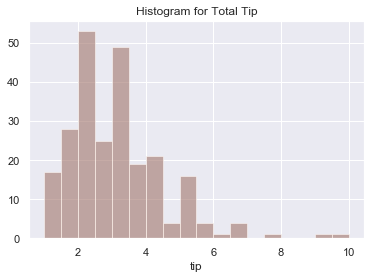

In [5]:
# [II] Plot a histogram of Tips only
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram for Total Tip")
plt.show()

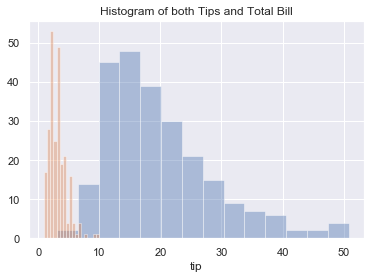

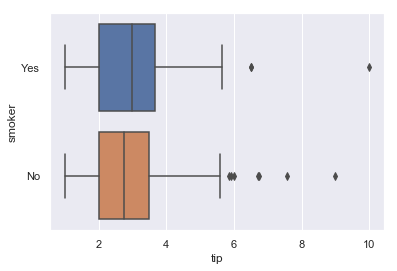

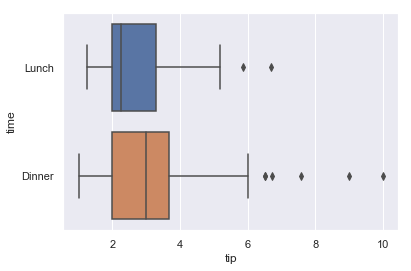

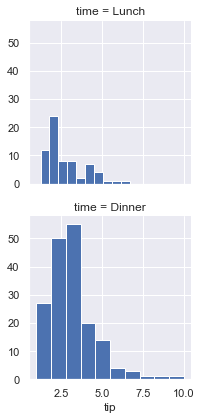

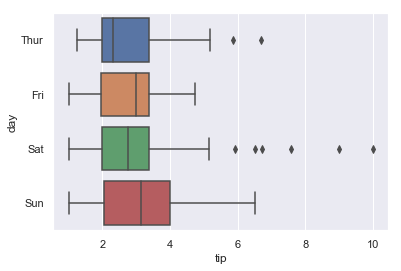

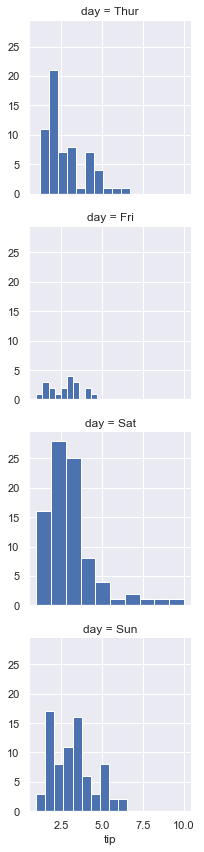

In [15]:
# [III] Plot a histogram of both the total bill and the tips
sns.distplot(tips_data["total_bill"], kde=False)
sns.distplot(tips_data["tip"], kde=False).set_title("Histogram of both Tips and Total Bill")
plt.show()

# [IV] Create a boxplot of the tips grouped by smoking status
sns.boxplot(x = tips_data["tip"], y = tips_data["smoker"])
plt.show()

# [V] Create a boxplot and a histogram of the tips grouped by the time of the day
sns.boxplot(x = tips_data["tip"], y = tips_data["time"])
g = sns.FacetGrid(tips_data, row="time")
g = g.map(plt.hist, "tip")
plt.show()

# [VI] Create a boxplot and histogram of the tips grouped by the day
sns.boxplot(x = tips_data["tip"], y = tips_data["day"])
g = sns.FacetGrid(tips_data, row = "day")
g = g.map(plt.hist, "tip")
plt.show()

## FacetGrid()- Multi-plot grid for plotting conditional relationships

# Create your own custom univariate data (Single variable) and plot it

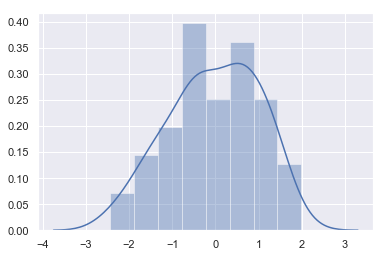

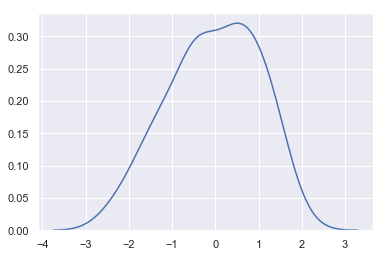

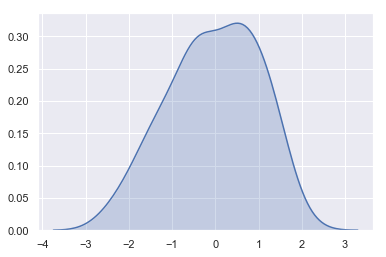

In [18]:
# [I] Plot the random normal data (Histogram + Density)
import numpy as np
sns.set(color_codes=False)   
x = np.random.normal(size=100)
sns.distplot(x)
plt.show()

# [II] Plot the random normal data (Density function only)
sns.kdeplot(x)
plt.show()

# [III] Plot the random normal data (Density function only)
sns.kdeplot(x, shade=True)
plt.show()



# Visualizing pairwise relationships in a dataset.

<class 'pandas.core.frame.DataFrame'>
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


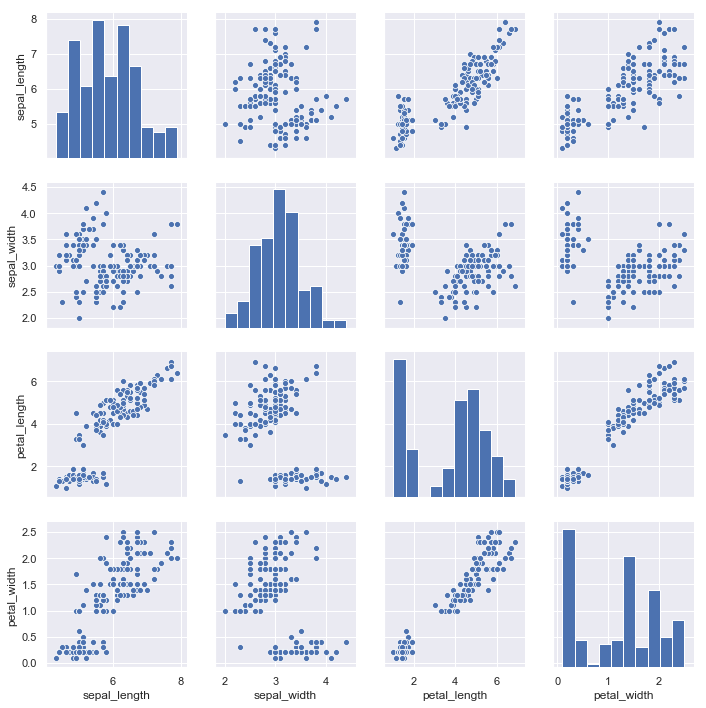

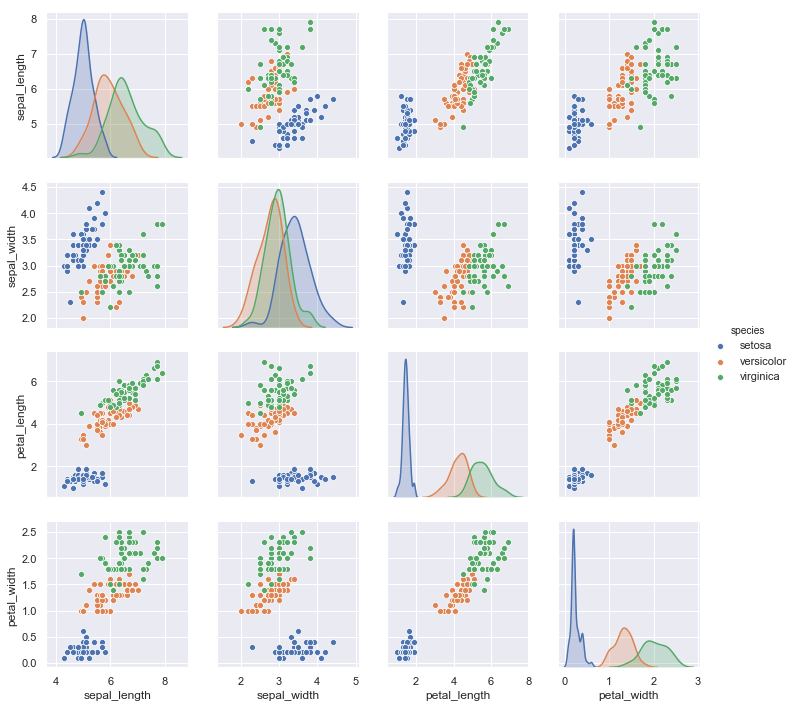

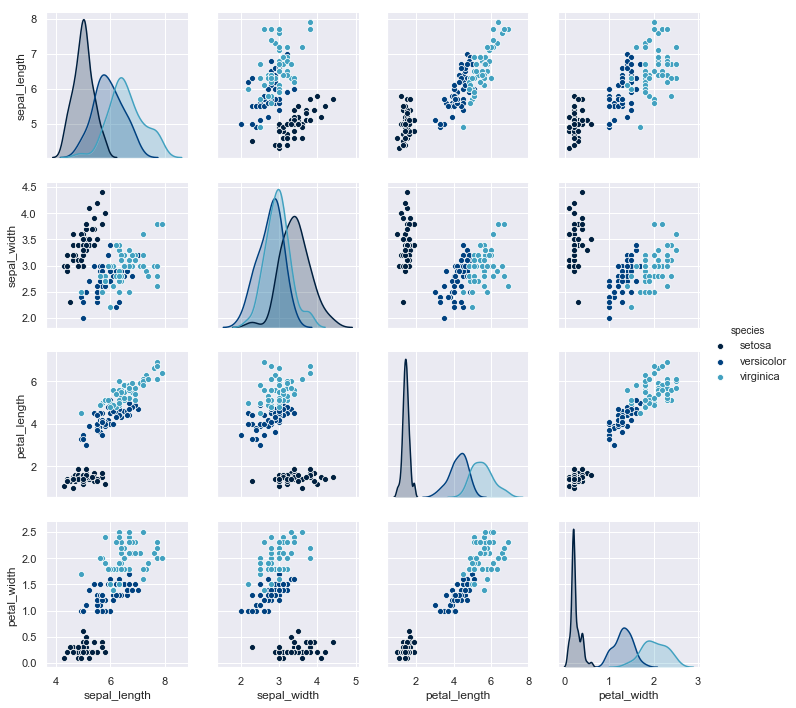

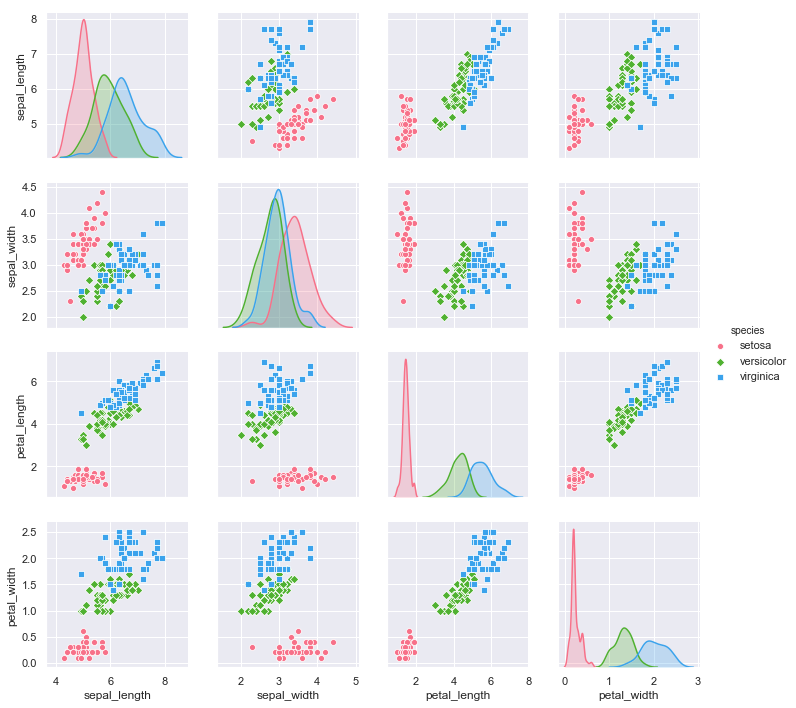

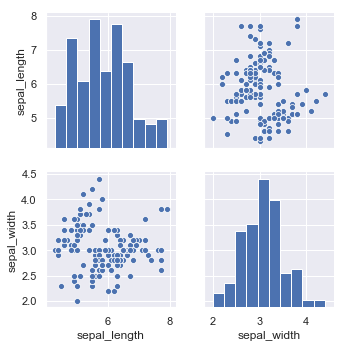

In [36]:
iris = sns.load_dataset("iris")     # Its a pandas DataFrame object
print(type(iris))
print(iris.columns)

# Without "hue"
sns.pairplot(iris)
plt.show()

# With "hue"
sns.pairplot(iris, hue="species")
plt.show()

# With "palette"
sns.pairplot(iris, hue="species", palette="ocean")  # Try palettes - RdBu, husl
plt.show()

# With "markers"
sns.pairplot(iris, hue="species", palette="husl", markers = ["o", "D", "s"])  # 'o'-Circle 'D'-Diamond 's'-Square '+'-Plus
plt.show()

# With "vars" Attribute - To visualize the relationship between specified variables
sns.pairplot(iris, vars=["sepal_length", "sepal_width"])
plt.show()

# Interpretation of Pair-plot - 
## 1. The diagonals represent the relationship of the variable to itself. 
## 2. Scatter plots represent the relationship of one variable to another. 
## 3. Pairplots with "hue" offer better visualization. For e.g. Observe the graph on the 3rd row and 4th column - between petal_width Vs. petal_length. We observe that, "iris-virginica" has the highest petal width and the petal length, while "iris-sentosa" has the smallest petal width and petal length. 
## 4. Another inference from the same plot- There is a positive relationship between the petal length and petal width - Higher the petal length, higher the petal width and vice versa. 